In [3]:
#%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import cos, sin, pi
from statistics import mean
import os.path
import math
shape_size = 48

# define loss history
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

#plot losses
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

# input dimension
in_dim = 6
out_dim = 200
def init_model():
    model = Sequential()
    model.add(Dense(20, input_dim=in_dim))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(500))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(200))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(200))
    model.add(Activation('relu'))
    model.add(Dense(200))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
#     model.add(Dense(70))
#     model.add(Dropout(0.2))
#     model.add(Activation('relu'))
#     model.add(Dense(100))
#     model.add(Activation('relu'))
    model.add(Dense(out_dim))
    model.add(Activation('sigmoid'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

In [6]:
data_size = 0
dummy1 = [0]*200
dummy2 = [0]*6
SP = np.array(np.reshape(dummy1, (1, 200)))
SH = np.array(np.reshape(dummy2, (1, 6)))
for i in range(2, 42):
    path = 'meep_code/data/DATA'+str(i)
    if not os.path.exists(path):
        #miss.append(i)
        print('Missing batch:' + str(i))
        continue
        
    files = next(os.walk(path))[2] #dir is your directory path as string]
    num_data = len(files)
    data_size += num_data
    skip = []
    
    coordinates = np.genfromtxt('meep_code/data/DATA'+str(i)+'_sh.txt')
    xc, yc = coordinates[:, 0], coordinates[:, 1]
    xc = np.reshape(xc, (num_data, shape_size))
    yc = np.reshape(yc, (num_data, shape_size))
    
    for j in range(num_data):
        tmp = np.genfromtxt(path+'/'+'DATA'+str(i)+'_sp'+str(j)+'.txt')
        valid = True
        for q in range(200): 
            
            if math.isnan(float(tmp[q])):
                print('Batch '+str(i)+'\tsample '+str(j)+' has NAN value')
                valid = False
                break
            if tmp[q] > 3:
                print('Batch '+str(i)+'\tsample '+str(j)+' has extreme value')
                valid = False
                break
        if not valid:
            #skip.append(j)
            continue
        SP = np.concatenate((SP, np.reshape(tmp, (1, 200))))
        tmp = []
        for q in range(6):
            tmp.append(math.sqrt(xc[j][q]**2 + yc[j][q]**2))
        SH = np.concatenate((SH, np.reshape(np.array(tmp), (1, 6))))
        #print(SP.shape)
    #print(files)
#     coordinates = np.genfromtxt('meep_code/data/DATA'+str(i)+'_sh.txt')
#     xc, yc = coordinates[:, 0], coordinates[:, 1]
#     xc = np.reshape(xc, (num_data, shape_size))
#     yc = np.reshape(yc, (num_data, shape_size))
#     for j in range(num_data):
#         if j in skip:
#             continue
#         tmp = []
#         for q in range(6):
#             tmp.append(math.sqrt(xc[j][q]**2 + yc[j][q]**2))
#         SH = np.concatenate((SH, np.reshape(np.array(tmp), (1, 6))))
    print('Batch '+str(i)+' has \t'+str(num_data)) 
#     freq = np.genfromtxt('meep_code/data/freq.txt')   
#     for j in range(num_data):
#         print(j)
#         plt.ylim(0, 1.1)
#         plt.plot(freq, SP[data_size - num_data + j + 1])
#         plt.show()
#         plt.axis('equal')
#         plt.ylim(-0.5, 0.5)
#         plt.xlim(-0.5, 0.5)
#         plt.plot(xc[j], yc[j])
#         plt.fill(xc[j], yc[j])
#         plt.show()

Batch 2 has 	7
Batch 3 has 	6
Batch 4 has 	17
Batch 5 has 	5
Batch 6 has 	14
Batch 7 has 	14
Batch 8 has 	40
Batch 9 has 	5
Batch 10 has 	14
Batch 11 has 	14
Batch 12 has 	40
Batch 13 has 	13
Batch 14 has 	37
Batch 15 has 	37
Missing batch:16
Batch 17 has 	5
Batch 18 has 	14
Batch 19 has 	14
Batch 20 has 	40
Batch 21 has 	13
Batch 22 has 	37
Batch 23 has 	37
Batch 24 has 	106
Batch 25 has 	13
Batch 26 has 	37
Batch 27 has 	37
Batch 28 has 	106
Batch 29 has 	35
Batch 30 has 	100
Batch 31 has 	100
Batch 32 has 	287
Batch 33 has 	5
Batch 34 has 	14
Batch 35 has 	14
Batch 36 has 	40
Batch 37 has 	13
Batch 38 has 	37
Batch 39 has 	37
Batch 40 has 	106
Batch 41 has 	13


In [7]:
DATA = np.append(SP, SH, axis = 1)
np.random.shuffle(DATA)

Y = DATA[:, :200]
X = DATA[:,200:]

train_size = int(len(DATA) * 0.8)

train_X = X[0:train_size, :]
train_Y = Y[0:train_size, :]
test_X = X[train_size:, :]
test_Y = Y[train_size:, :]

W0726 15:39:43.332967 139638701143872 deprecation_wrapper.py:119] From /home/shengnan/anaconda3/envs/mp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 15:39:43.394692 139638701143872 deprecation_wrapper.py:119] From /home/shengnan/anaconda3/envs/mp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 15:39:43.406083 139638701143872 deprecation_wrapper.py:119] From /home/shengnan/anaconda3/envs/mp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 15:39:43.460803 139638701143872 deprecation_wrapper.py:119] From /home/shengnan/anaconda3/envs/mp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is depre

Train on 1219 samples, validate on 305 samples
Epoch 1/1000
 - 5s - loss: 0.0856 - acc: 0.0090 - val_loss: 0.0576 - val_acc: 0.0098
Epoch 2/1000
 - 2s - loss: 0.0623 - acc: 0.0066 - val_loss: 0.0604 - val_acc: 0.0000e+00
Epoch 3/1000
 - 2s - loss: 0.0598 - acc: 0.0090 - val_loss: 0.0546 - val_acc: 0.0066
Epoch 4/1000
 - 2s - loss: 0.0587 - acc: 0.0066 - val_loss: 0.0537 - val_acc: 0.0000e+00
Epoch 5/1000
 - 2s - loss: 0.0575 - acc: 0.0066 - val_loss: 0.0602 - val_acc: 0.0066
Epoch 6/1000
 - 2s - loss: 0.0568 - acc: 0.0074 - val_loss: 0.0559 - val_acc: 0.0066
Epoch 7/1000
 - 2s - loss: 0.0555 - acc: 0.0049 - val_loss: 0.0561 - val_acc: 0.0033
Epoch 8/1000
 - 3s - loss: 0.0555 - acc: 0.0066 - val_loss: 0.0532 - val_acc: 0.0098
Epoch 9/1000
 - 2s - loss: 0.0549 - acc: 0.0025 - val_loss: 0.0601 - val_acc: 0.0066
Epoch 10/1000
 - 2s - loss: 0.0535 - acc: 0.0115 - val_loss: 0.0560 - val_acc: 0.0033
Epoch 11/1000
 - 2s - loss: 0.0530 - acc: 0.0066 - val_loss: 0.0545 - val_acc: 0.0066
Epoch 12

Epoch 96/1000
 - 2s - loss: 0.0333 - acc: 0.0221 - val_loss: 0.0680 - val_acc: 0.0098
Epoch 97/1000
 - 2s - loss: 0.0335 - acc: 0.0263 - val_loss: 0.0618 - val_acc: 0.0066
Epoch 98/1000
 - 2s - loss: 0.0338 - acc: 0.0213 - val_loss: 0.0680 - val_acc: 0.0033
Epoch 99/1000
 - 2s - loss: 0.0334 - acc: 0.0180 - val_loss: 0.0637 - val_acc: 0.0033
Epoch 100/1000
 - 2s - loss: 0.0333 - acc: 0.0263 - val_loss: 0.0582 - val_acc: 0.0066
Epoch 101/1000
 - 2s - loss: 0.0340 - acc: 0.0221 - val_loss: 0.0683 - val_acc: 0.0033
Epoch 102/1000
 - 2s - loss: 0.0334 - acc: 0.0246 - val_loss: 0.0641 - val_acc: 0.0066
Epoch 103/1000
 - 2s - loss: 0.0327 - acc: 0.0197 - val_loss: 0.0654 - val_acc: 0.0033
Epoch 104/1000
 - 2s - loss: 0.0326 - acc: 0.0279 - val_loss: 0.0666 - val_acc: 0.0033
Epoch 105/1000
 - 2s - loss: 0.0332 - acc: 0.0246 - val_loss: 0.0630 - val_acc: 0.0066
Epoch 106/1000
 - 2s - loss: 0.0336 - acc: 0.0213 - val_loss: 0.0653 - val_acc: 0.0033
Epoch 107/1000
 - 2s - loss: 0.0338 - acc: 0.02

Epoch 191/1000
 - 2s - loss: 0.0299 - acc: 0.0287 - val_loss: 0.0595 - val_acc: 0.0131
Epoch 192/1000
 - 2s - loss: 0.0294 - acc: 0.0304 - val_loss: 0.0648 - val_acc: 0.0164
Epoch 193/1000
 - 2s - loss: 0.0295 - acc: 0.0336 - val_loss: 0.0623 - val_acc: 0.0230
Epoch 194/1000
 - 2s - loss: 0.0292 - acc: 0.0295 - val_loss: 0.0663 - val_acc: 0.0098
Epoch 195/1000
 - 2s - loss: 0.0299 - acc: 0.0238 - val_loss: 0.0691 - val_acc: 0.0230
Epoch 196/1000
 - 2s - loss: 0.0293 - acc: 0.0263 - val_loss: 0.0601 - val_acc: 0.0131
Epoch 197/1000
 - 2s - loss: 0.0293 - acc: 0.0386 - val_loss: 0.0667 - val_acc: 0.0098
Epoch 198/1000
 - 3s - loss: 0.0292 - acc: 0.0263 - val_loss: 0.0653 - val_acc: 0.0066
Epoch 199/1000
 - 2s - loss: 0.0297 - acc: 0.0345 - val_loss: 0.0632 - val_acc: 0.0098
Epoch 200/1000
 - 2s - loss: 0.0291 - acc: 0.0180 - val_loss: 0.0661 - val_acc: 0.0066
Epoch 201/1000
 - 2s - loss: 0.0294 - acc: 0.0271 - val_loss: 0.0620 - val_acc: 0.0033
Epoch 202/1000
 - 2s - loss: 0.0297 - acc: 

Epoch 285/1000
 - 1s - loss: 0.0275 - acc: 0.0271 - val_loss: 0.0646 - val_acc: 0.0098
Epoch 286/1000
 - 2s - loss: 0.0274 - acc: 0.0254 - val_loss: 0.0623 - val_acc: 0.0033
Epoch 287/1000
 - 1s - loss: 0.0273 - acc: 0.0263 - val_loss: 0.0633 - val_acc: 0.0000e+00
Epoch 288/1000
 - 1s - loss: 0.0275 - acc: 0.0213 - val_loss: 0.0646 - val_acc: 0.0066
Epoch 289/1000
 - 2s - loss: 0.0278 - acc: 0.0238 - val_loss: 0.0641 - val_acc: 0.0066
Epoch 290/1000
 - 1s - loss: 0.0280 - acc: 0.0230 - val_loss: 0.0677 - val_acc: 0.0098
Epoch 291/1000
 - 2s - loss: 0.0274 - acc: 0.0189 - val_loss: 0.0658 - val_acc: 0.0098
Epoch 292/1000
 - 3s - loss: 0.0279 - acc: 0.0213 - val_loss: 0.0651 - val_acc: 0.0066
Epoch 293/1000
 - 2s - loss: 0.0272 - acc: 0.0279 - val_loss: 0.0635 - val_acc: 0.0066
Epoch 294/1000
 - 2s - loss: 0.0276 - acc: 0.0238 - val_loss: 0.0607 - val_acc: 0.0033
Epoch 295/1000
 - 2s - loss: 0.0279 - acc: 0.0246 - val_loss: 0.0637 - val_acc: 0.0033
Epoch 296/1000
 - 2s - loss: 0.0280 - a

Epoch 379/1000
 - 2s - loss: 0.0272 - acc: 0.0230 - val_loss: 0.0616 - val_acc: 0.0066
Epoch 380/1000
 - 2s - loss: 0.0268 - acc: 0.0328 - val_loss: 0.0621 - val_acc: 0.0000e+00
Epoch 381/1000
 - 2s - loss: 0.0260 - acc: 0.0279 - val_loss: 0.0620 - val_acc: 0.0033
Epoch 382/1000
 - 2s - loss: 0.0263 - acc: 0.0287 - val_loss: 0.0637 - val_acc: 0.0098
Epoch 383/1000
 - 1s - loss: 0.0270 - acc: 0.0238 - val_loss: 0.0629 - val_acc: 0.0000e+00
Epoch 384/1000
 - 1s - loss: 0.0262 - acc: 0.0295 - val_loss: 0.0614 - val_acc: 0.0066
Epoch 385/1000
 - 1s - loss: 0.0263 - acc: 0.0287 - val_loss: 0.0622 - val_acc: 0.0033
Epoch 386/1000
 - 1s - loss: 0.0262 - acc: 0.0287 - val_loss: 0.0623 - val_acc: 0.0066
Epoch 387/1000
 - 2s - loss: 0.0263 - acc: 0.0263 - val_loss: 0.0625 - val_acc: 0.0066
Epoch 388/1000
 - 2s - loss: 0.0261 - acc: 0.0279 - val_loss: 0.0620 - val_acc: 0.0066
Epoch 389/1000
 - 2s - loss: 0.0260 - acc: 0.0320 - val_loss: 0.0647 - val_acc: 0.0098
Epoch 390/1000
 - 2s - loss: 0.0260

Epoch 473/1000
 - 1s - loss: 0.0261 - acc: 0.0304 - val_loss: 0.0681 - val_acc: 0.0098
Epoch 474/1000
 - 1s - loss: 0.0255 - acc: 0.0287 - val_loss: 0.0647 - val_acc: 0.0098
Epoch 475/1000
 - 1s - loss: 0.0256 - acc: 0.0254 - val_loss: 0.0608 - val_acc: 0.0197
Epoch 476/1000
 - 1s - loss: 0.0268 - acc: 0.0312 - val_loss: 0.0631 - val_acc: 0.0098
Epoch 477/1000
 - 1s - loss: 0.0255 - acc: 0.0394 - val_loss: 0.0643 - val_acc: 0.0066
Epoch 478/1000
 - 1s - loss: 0.0256 - acc: 0.0263 - val_loss: 0.0645 - val_acc: 0.0066
Epoch 479/1000
 - 1s - loss: 0.0254 - acc: 0.0254 - val_loss: 0.0672 - val_acc: 0.0131
Epoch 480/1000
 - 1s - loss: 0.0254 - acc: 0.0345 - val_loss: 0.0647 - val_acc: 0.0098
Epoch 481/1000
 - 1s - loss: 0.0251 - acc: 0.0386 - val_loss: 0.0637 - val_acc: 0.0033
Epoch 482/1000
 - 1s - loss: 0.0253 - acc: 0.0312 - val_loss: 0.0618 - val_acc: 0.0131
Epoch 483/1000
 - 1s - loss: 0.0260 - acc: 0.0369 - val_loss: 0.0634 - val_acc: 0.0066
Epoch 484/1000
 - 1s - loss: 0.0261 - acc: 

 - 2s - loss: 0.0244 - acc: 0.0369 - val_loss: 0.0636 - val_acc: 0.0098
Epoch 568/1000
 - 2s - loss: 0.0248 - acc: 0.0377 - val_loss: 0.0627 - val_acc: 0.0098
Epoch 569/1000
 - 2s - loss: 0.0255 - acc: 0.0345 - val_loss: 0.0647 - val_acc: 0.0230
Epoch 570/1000
 - 1s - loss: 0.0239 - acc: 0.0459 - val_loss: 0.0631 - val_acc: 0.0066
Epoch 571/1000
 - 1s - loss: 0.0242 - acc: 0.0287 - val_loss: 0.0639 - val_acc: 0.0131
Epoch 572/1000
 - 1s - loss: 0.0264 - acc: 0.0320 - val_loss: 0.0627 - val_acc: 0.0098
Epoch 573/1000
 - 1s - loss: 0.0244 - acc: 0.0369 - val_loss: 0.0616 - val_acc: 0.0066
Epoch 574/1000
 - 1s - loss: 0.0255 - acc: 0.0320 - val_loss: 0.0621 - val_acc: 0.0066
Epoch 575/1000
 - 1s - loss: 0.0250 - acc: 0.0345 - val_loss: 0.0629 - val_acc: 0.0098
Epoch 576/1000
 - 1s - loss: 0.0244 - acc: 0.0295 - val_loss: 0.0641 - val_acc: 0.0098
Epoch 577/1000
 - 1s - loss: 0.0249 - acc: 0.0345 - val_loss: 0.0612 - val_acc: 0.0066
Epoch 578/1000
 - 1s - loss: 0.0249 - acc: 0.0410 - val_lo

Epoch 661/1000
 - 2s - loss: 0.0239 - acc: 0.0304 - val_loss: 0.0668 - val_acc: 0.0066
Epoch 662/1000
 - 2s - loss: 0.0244 - acc: 0.0320 - val_loss: 0.0626 - val_acc: 0.0033
Epoch 663/1000
 - 2s - loss: 0.0238 - acc: 0.0353 - val_loss: 0.0626 - val_acc: 0.0033
Epoch 664/1000
 - 2s - loss: 0.0238 - acc: 0.0353 - val_loss: 0.0614 - val_acc: 0.0066
Epoch 665/1000
 - 2s - loss: 0.0240 - acc: 0.0336 - val_loss: 0.0630 - val_acc: 0.0000e+00
Epoch 666/1000
 - 2s - loss: 0.0244 - acc: 0.0361 - val_loss: 0.0654 - val_acc: 0.0000e+00
Epoch 667/1000
 - 2s - loss: 0.0246 - acc: 0.0410 - val_loss: 0.0628 - val_acc: 0.0066
Epoch 668/1000
 - 2s - loss: 0.0249 - acc: 0.0402 - val_loss: 0.0634 - val_acc: 0.0098
Epoch 669/1000
 - 2s - loss: 0.0230 - acc: 0.0361 - val_loss: 0.0640 - val_acc: 0.0000e+00
Epoch 670/1000
 - 2s - loss: 0.0244 - acc: 0.0402 - val_loss: 0.0639 - val_acc: 0.0000e+00
Epoch 671/1000
 - 2s - loss: 0.0244 - acc: 0.0410 - val_loss: 0.0662 - val_acc: 0.0000e+00
Epoch 672/1000
 - 2s - 

Epoch 755/1000
 - 2s - loss: 0.0240 - acc: 0.0353 - val_loss: 0.0625 - val_acc: 0.0295
Epoch 756/1000
 - 2s - loss: 0.0236 - acc: 0.0394 - val_loss: 0.0628 - val_acc: 0.0230
Epoch 757/1000
 - 2s - loss: 0.0229 - acc: 0.0386 - val_loss: 0.0641 - val_acc: 0.0197
Epoch 758/1000
 - 2s - loss: 0.0228 - acc: 0.0394 - val_loss: 0.0644 - val_acc: 0.0131
Epoch 759/1000
 - 2s - loss: 0.0236 - acc: 0.0312 - val_loss: 0.0611 - val_acc: 0.0164
Epoch 760/1000
 - 2s - loss: 0.0238 - acc: 0.0336 - val_loss: 0.0609 - val_acc: 0.0131
Epoch 761/1000
 - 2s - loss: 0.0236 - acc: 0.0361 - val_loss: 0.0618 - val_acc: 0.0164
Epoch 762/1000
 - 2s - loss: 0.0232 - acc: 0.0345 - val_loss: 0.0677 - val_acc: 0.0098
Epoch 763/1000
 - 2s - loss: 0.0239 - acc: 0.0328 - val_loss: 0.0662 - val_acc: 0.0000e+00
Epoch 764/1000
 - 2s - loss: 0.0234 - acc: 0.0312 - val_loss: 0.0641 - val_acc: 0.0033
Epoch 765/1000
 - 2s - loss: 0.0232 - acc: 0.0361 - val_loss: 0.0644 - val_acc: 0.0098
Epoch 766/1000
 - 2s - loss: 0.0241 - a

Epoch 849/1000
 - 2s - loss: 0.0232 - acc: 0.0361 - val_loss: 0.0626 - val_acc: 0.0066
Epoch 850/1000
 - 2s - loss: 0.0236 - acc: 0.0336 - val_loss: 0.0659 - val_acc: 0.0131
Epoch 851/1000
 - 2s - loss: 0.0233 - acc: 0.0435 - val_loss: 0.0627 - val_acc: 0.0131
Epoch 852/1000
 - 2s - loss: 0.0230 - acc: 0.0287 - val_loss: 0.0640 - val_acc: 0.0000e+00
Epoch 853/1000
 - 2s - loss: 0.0230 - acc: 0.0377 - val_loss: 0.0666 - val_acc: 0.0066
Epoch 854/1000
 - 2s - loss: 0.0237 - acc: 0.0394 - val_loss: 0.0642 - val_acc: 0.0098
Epoch 855/1000
 - 2s - loss: 0.0231 - acc: 0.0394 - val_loss: 0.0683 - val_acc: 0.0066
Epoch 856/1000
 - 2s - loss: 0.0230 - acc: 0.0369 - val_loss: 0.0601 - val_acc: 0.0033
Epoch 857/1000
 - 2s - loss: 0.0234 - acc: 0.0312 - val_loss: 0.0656 - val_acc: 0.0098
Epoch 858/1000
 - 2s - loss: 0.0232 - acc: 0.0320 - val_loss: 0.0638 - val_acc: 0.0033
Epoch 859/1000
 - 2s - loss: 0.0231 - acc: 0.0369 - val_loss: 0.0642 - val_acc: 0.0033
Epoch 860/1000
 - 2s - loss: 0.0231 - a

Epoch 943/1000
 - 2s - loss: 0.0229 - acc: 0.0435 - val_loss: 0.0600 - val_acc: 0.0098
Epoch 944/1000
 - 2s - loss: 0.0231 - acc: 0.0386 - val_loss: 0.0628 - val_acc: 0.0131
Epoch 945/1000
 - 2s - loss: 0.0225 - acc: 0.0345 - val_loss: 0.0621 - val_acc: 0.0098
Epoch 946/1000
 - 2s - loss: 0.0224 - acc: 0.0418 - val_loss: 0.0639 - val_acc: 0.0098
Epoch 947/1000
 - 2s - loss: 0.0236 - acc: 0.0394 - val_loss: 0.0643 - val_acc: 0.0066
Epoch 948/1000
 - 2s - loss: 0.0217 - acc: 0.0369 - val_loss: 0.0643 - val_acc: 0.0098
Epoch 949/1000
 - 2s - loss: 0.0228 - acc: 0.0394 - val_loss: 0.0629 - val_acc: 0.0098
Epoch 950/1000
 - 2s - loss: 0.0227 - acc: 0.0377 - val_loss: 0.0622 - val_acc: 0.0131
Epoch 951/1000
 - 2s - loss: 0.0229 - acc: 0.0361 - val_loss: 0.0623 - val_acc: 0.0066
Epoch 952/1000
 - 2s - loss: 0.0234 - acc: 0.0304 - val_loss: 0.0647 - val_acc: 0.0000e+00
Epoch 953/1000
 - 1s - loss: 0.0225 - acc: 0.0410 - val_loss: 0.0642 - val_acc: 0.0066
Epoch 954/1000
 - 2s - loss: 0.0228 - a

<IPython.core.display.Javascript object>


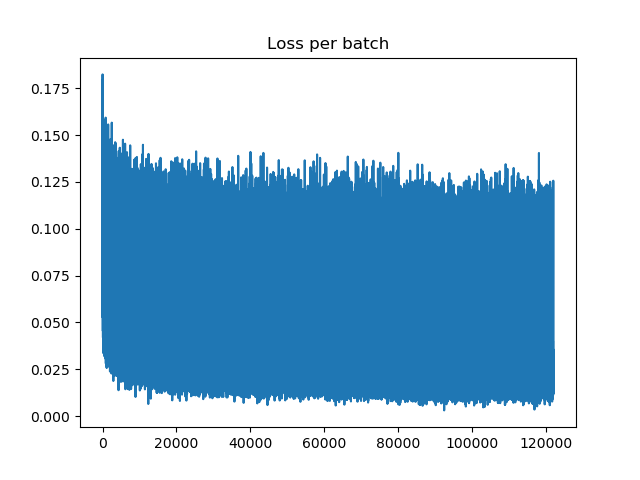

In [4]:
model = init_model()
history = LossHistory()
# when training, using minibatch seems to be pretty good
model.fit(train_X, train_Y, epochs=1000, batch_size=10,
                callbacks=[history],
                validation_data=(test_X, test_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=10)
print(score)
plot_losses(history.losses)

In [11]:
model.save('Simulator')

In [4]:
model = load_model('Simulator')

W0726 16:27:41.996426 139737506166592 deprecation_wrapper.py:119] From /home/shengnan/anaconda3/envs/mp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 16:27:42.049476 139737506166592 deprecation_wrapper.py:119] From /home/shengnan/anaconda3/envs/mp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 16:27:42.072472 139737506166592 deprecation_wrapper.py:119] From /home/shengnan/anaconda3/envs/mp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 16:27:42.084743 139737506166592 deprecation_wrapper.py:119] From /home/shengnan/anaconda3/envs/mp/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is depr

Test 0
True spectrum: 


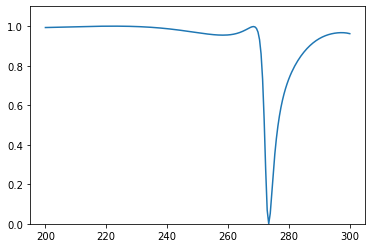

Predicted spectrum: 


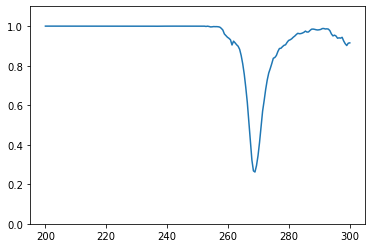

Test 1
True spectrum: 


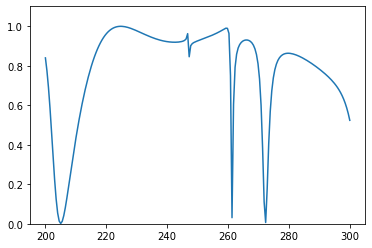

Predicted spectrum: 


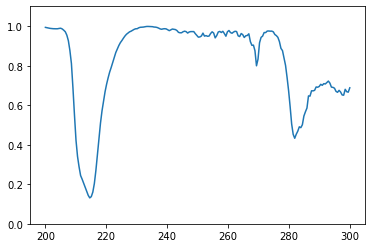

Test 2
True spectrum: 


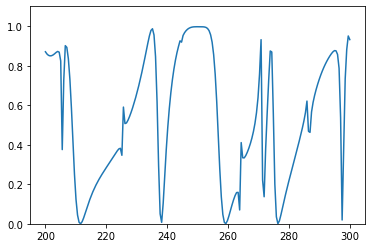

Predicted spectrum: 


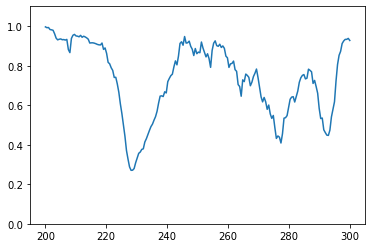

Test 3
True spectrum: 


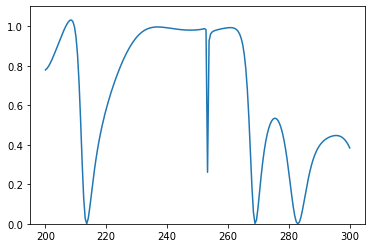

Predicted spectrum: 


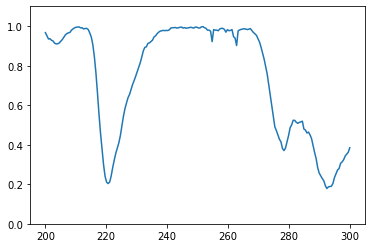

Test 4
True spectrum: 


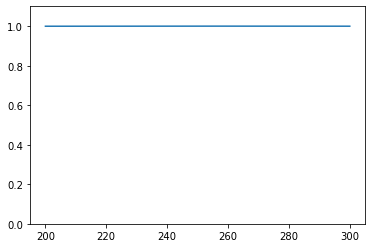

Predicted spectrum: 


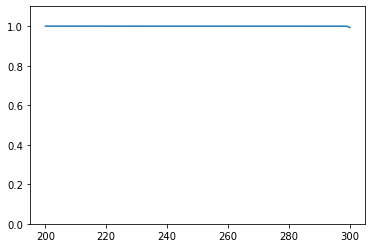

Test 5
True spectrum: 


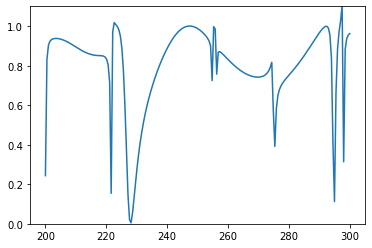

Predicted spectrum: 


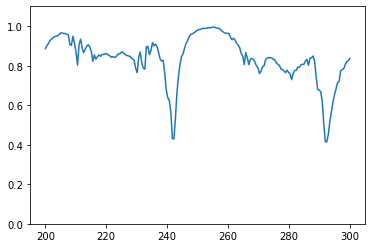

Test 6
True spectrum: 


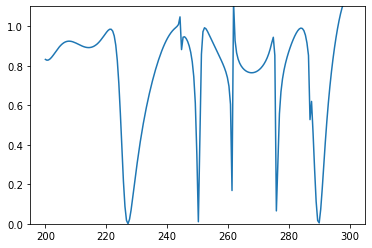

Predicted spectrum: 


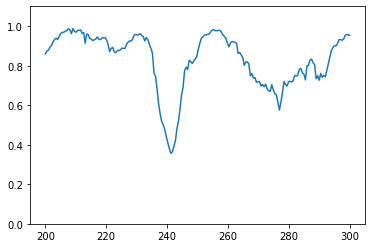

Test 7
True spectrum: 


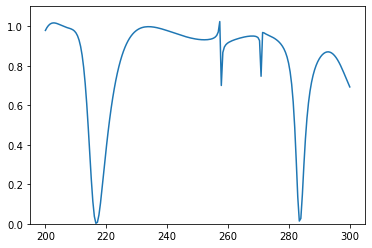

Predicted spectrum: 


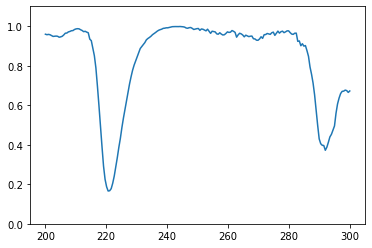

Test 8
True spectrum: 


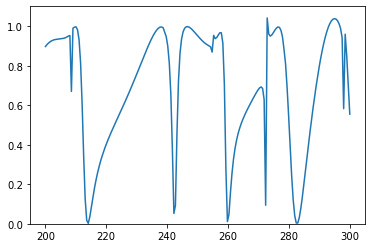

Predicted spectrum: 


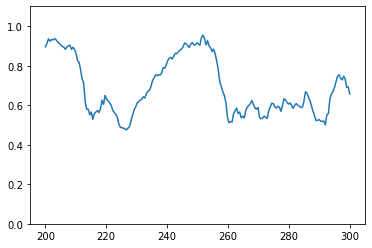

Test 9
True spectrum: 


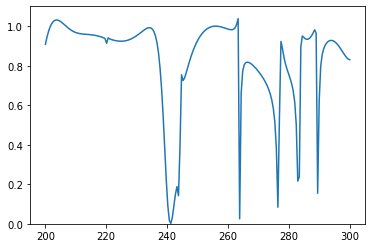

Predicted spectrum: 


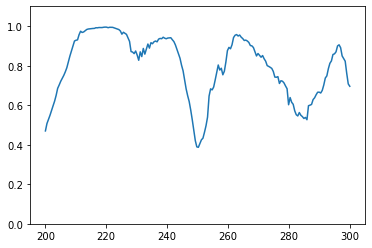

Test 10
True spectrum: 


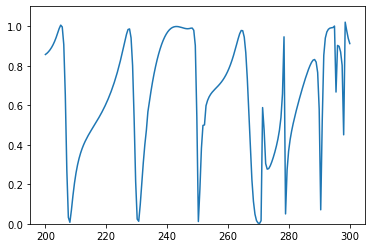

Predicted spectrum: 


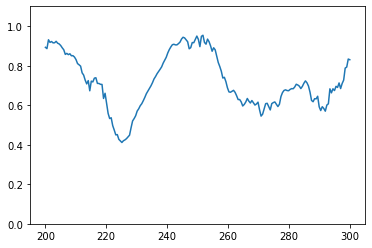

Test 11
True spectrum: 


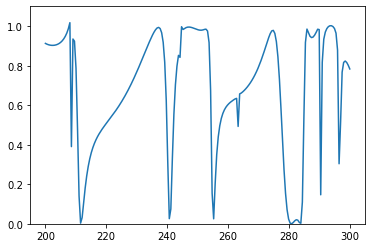

Predicted spectrum: 


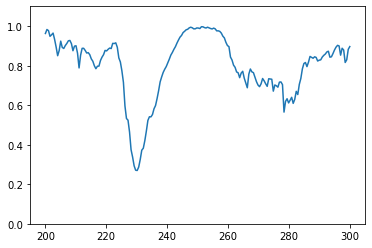

Test 12
True spectrum: 


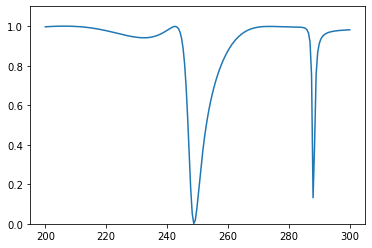

Predicted spectrum: 


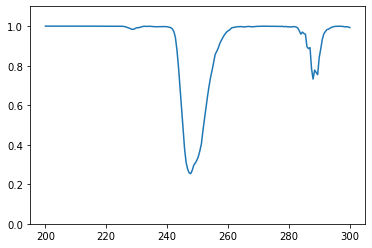

Test 13
True spectrum: 


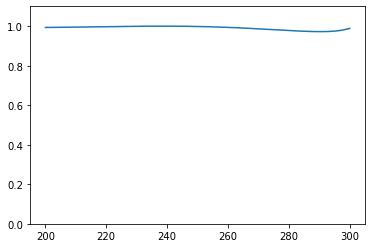

Predicted spectrum: 


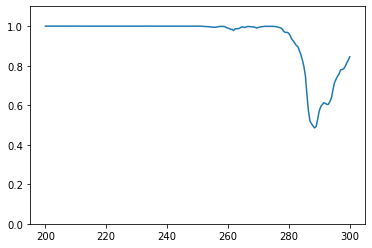

Test 14
True spectrum: 


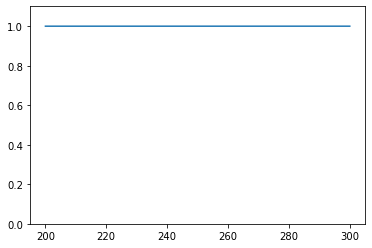

Predicted spectrum: 


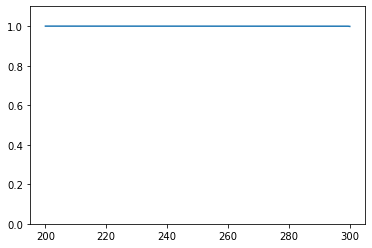

Test 15
True spectrum: 


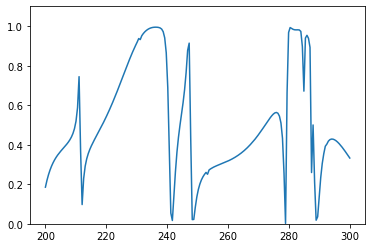

Predicted spectrum: 


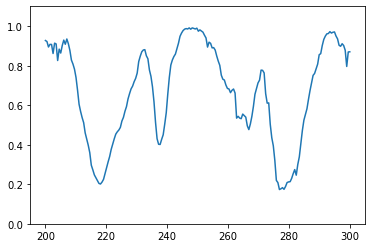

Test 16
True spectrum: 


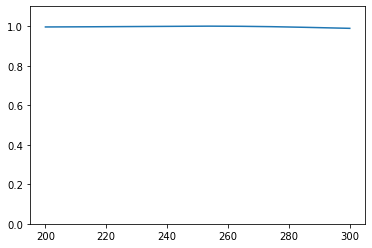

Predicted spectrum: 


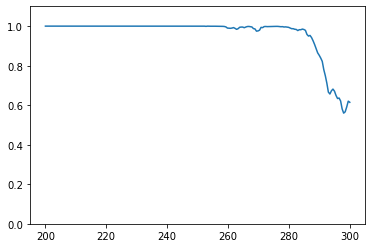

Test 17
True spectrum: 


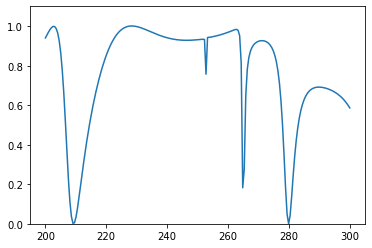

Predicted spectrum: 


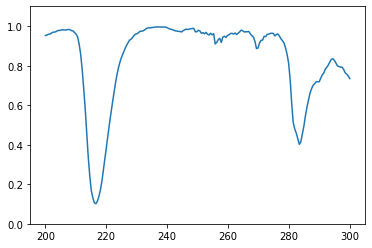

Test 18
True spectrum: 


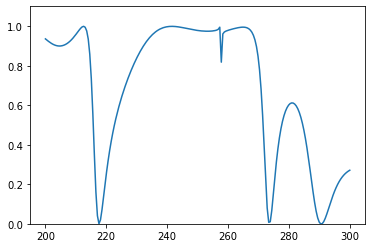

Predicted spectrum: 


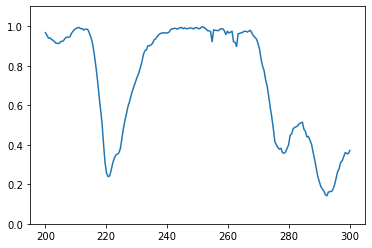

Test 19
True spectrum: 


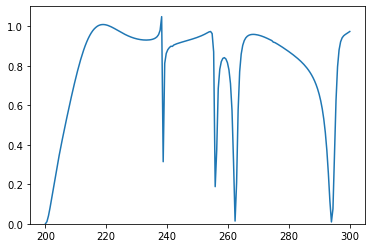

Predicted spectrum: 


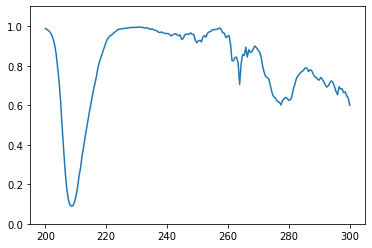

Test 20
True spectrum: 


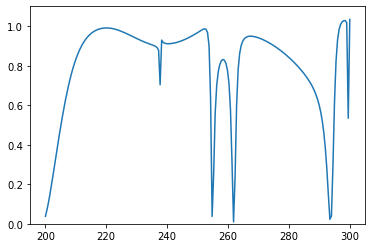

Predicted spectrum: 


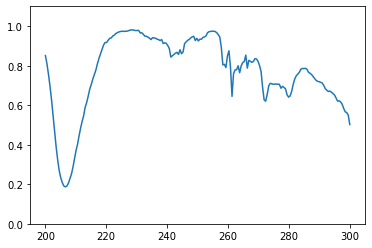

Test 21
True spectrum: 


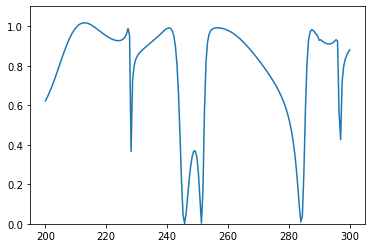

Predicted spectrum: 


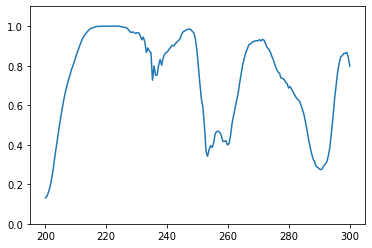

Test 22
True spectrum: 


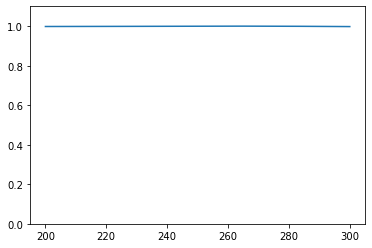

Predicted spectrum: 


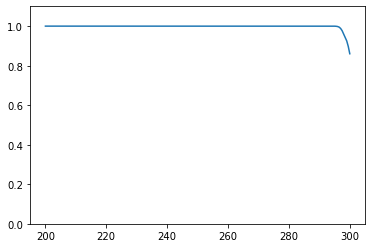

Test 23
True spectrum: 


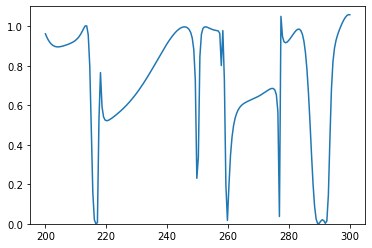

Predicted spectrum: 


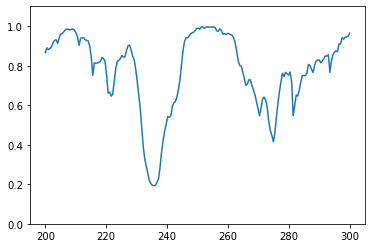

Test 24
True spectrum: 


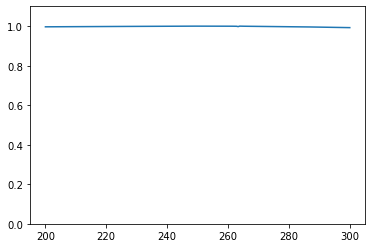

Predicted spectrum: 


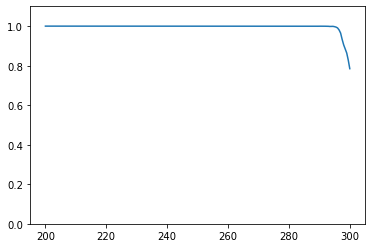

Test 25
True spectrum: 


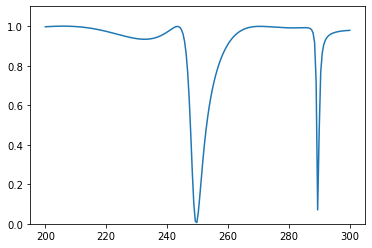

Predicted spectrum: 


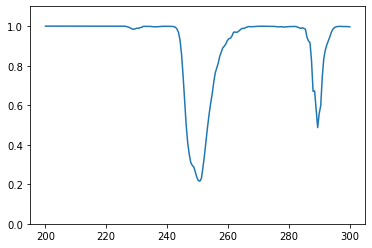

Test 26
True spectrum: 


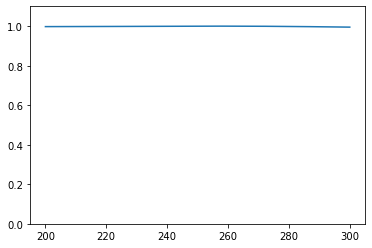

Predicted spectrum: 


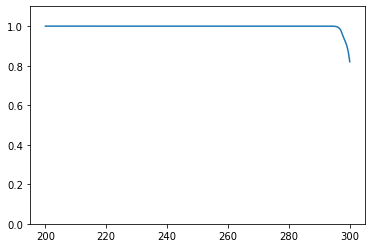

Test 27
True spectrum: 


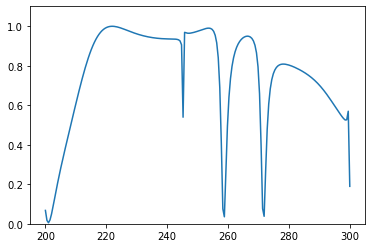

Predicted spectrum: 


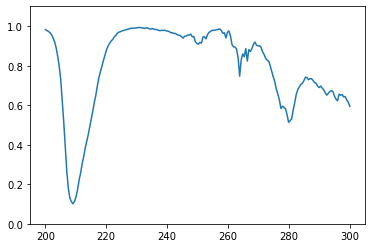

Test 28
True spectrum: 


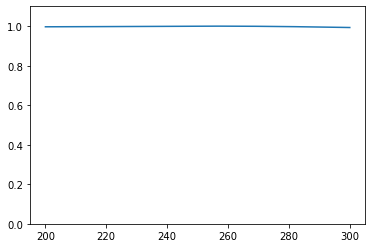

Predicted spectrum: 


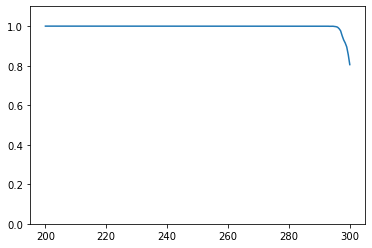

Test 29
True spectrum: 


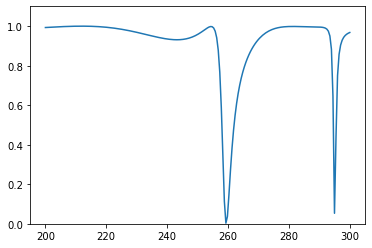

Predicted spectrum: 


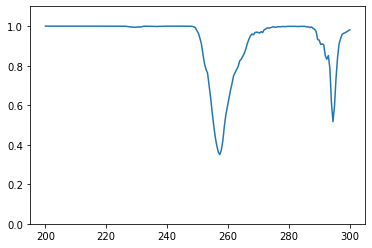

Test 30
True spectrum: 


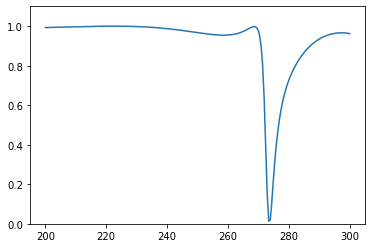

Predicted spectrum: 


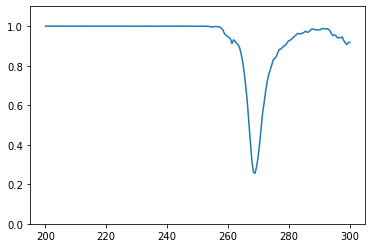

Test 31
True spectrum: 


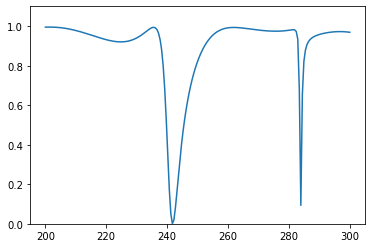

Predicted spectrum: 


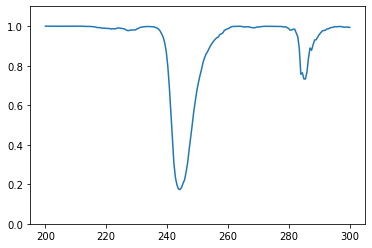

Test 32
True spectrum: 


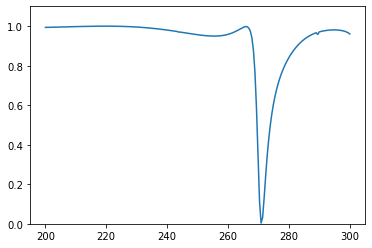

Predicted spectrum: 


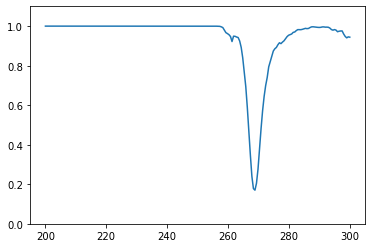

Test 33
True spectrum: 


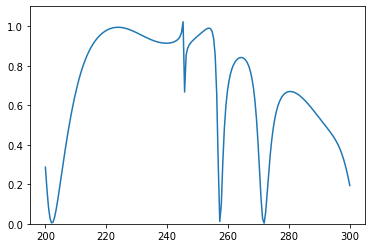

Predicted spectrum: 


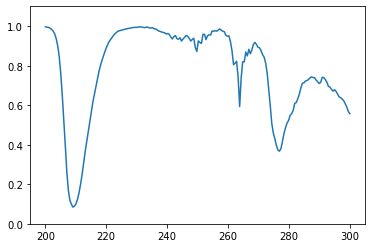

Test 34
True spectrum: 


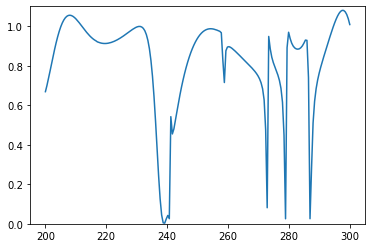

Predicted spectrum: 


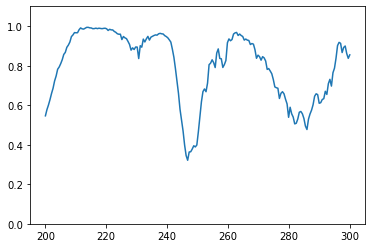

Test 35
True spectrum: 


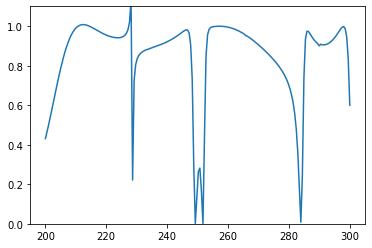

Predicted spectrum: 


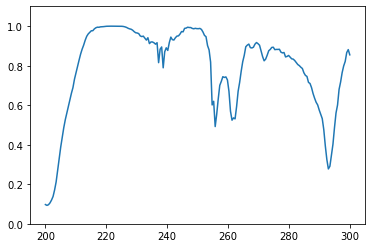

Test 36
True spectrum: 


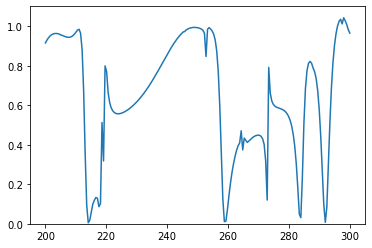

Predicted spectrum: 


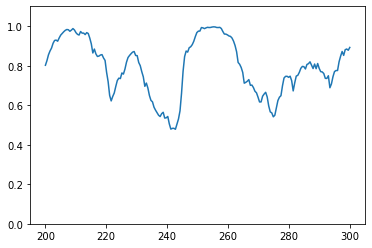

Test 37
True spectrum: 


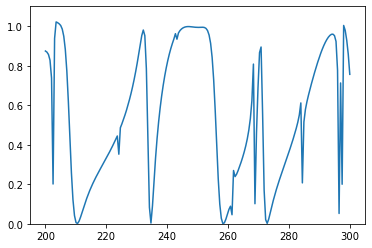

Predicted spectrum: 


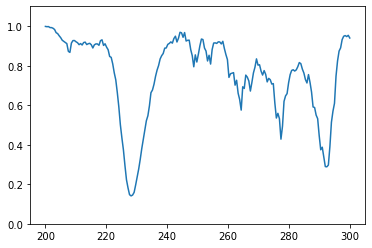

Test 38
True spectrum: 


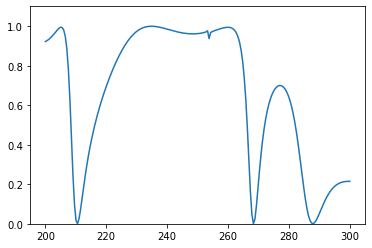

Predicted spectrum: 


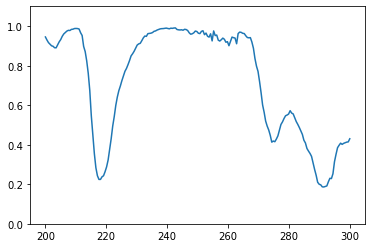

Test 39
True spectrum: 


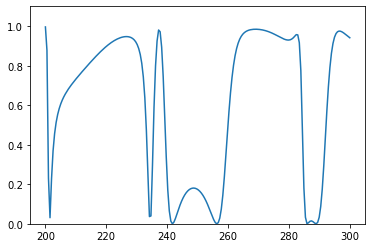

Predicted spectrum: 


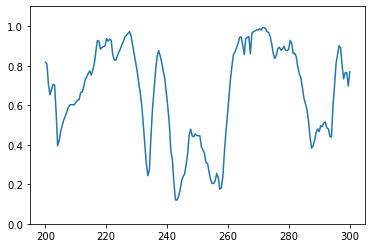

Test 40
True spectrum: 


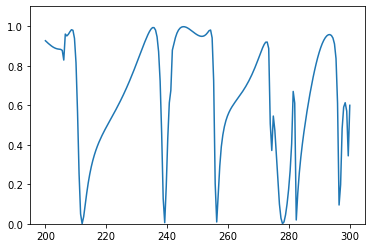

Predicted spectrum: 


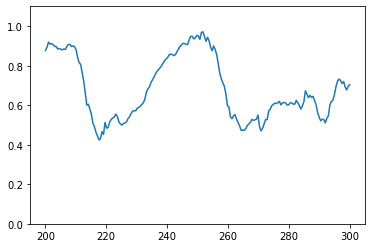

Test 41
True spectrum: 


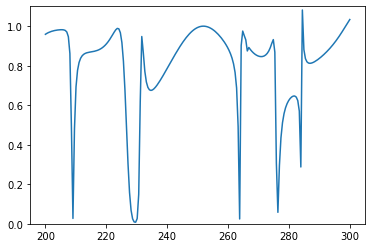

Predicted spectrum: 


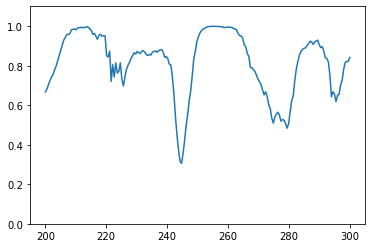

Test 42
True spectrum: 


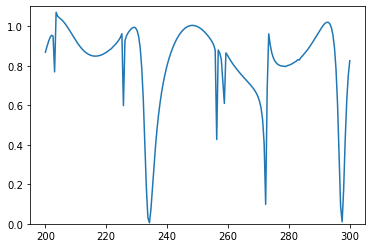

Predicted spectrum: 


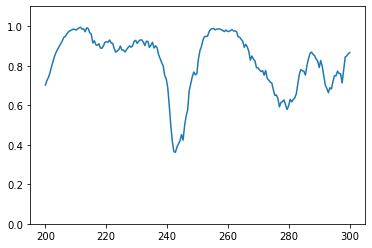

Test 43
True spectrum: 


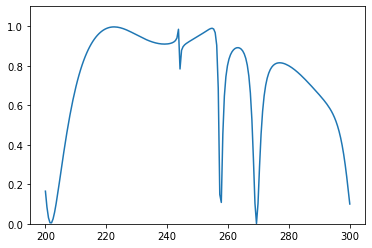

Predicted spectrum: 


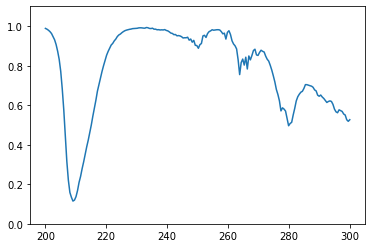

Test 44
True spectrum: 


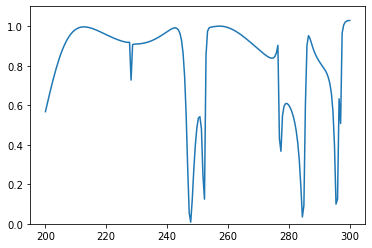

Predicted spectrum: 


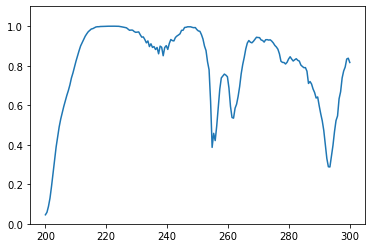

Test 45
True spectrum: 


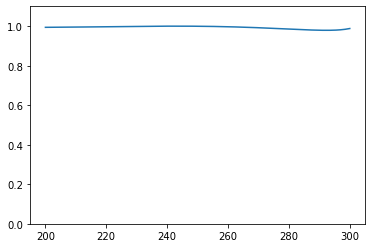

Predicted spectrum: 


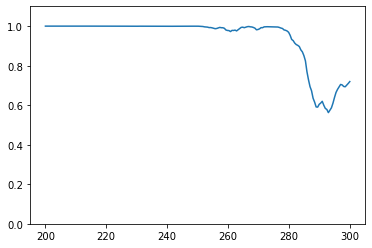

Test 46
True spectrum: 


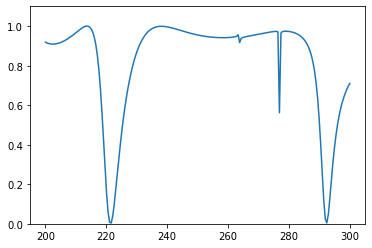

Predicted spectrum: 


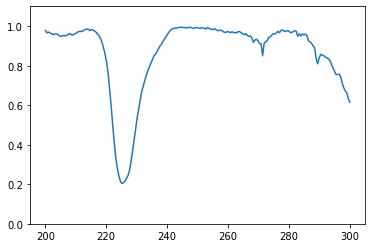

Test 47
True spectrum: 


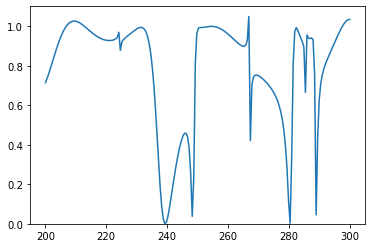

Predicted spectrum: 


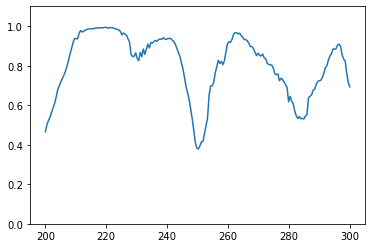

Test 48
True spectrum: 


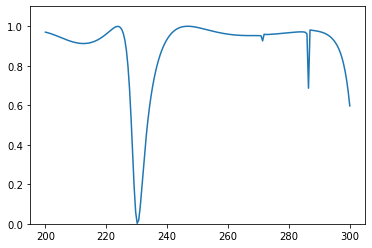

Predicted spectrum: 


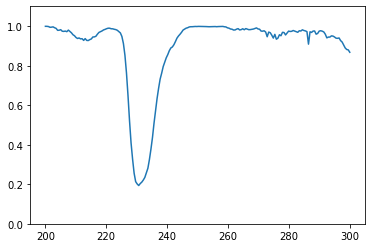

Test 49
True spectrum: 


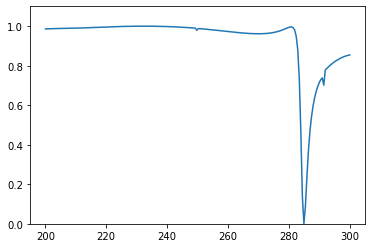

Predicted spectrum: 


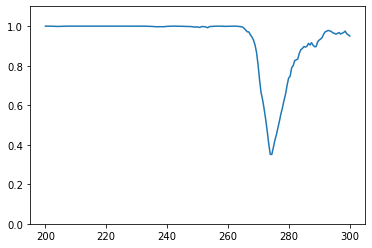

Test 50
True spectrum: 


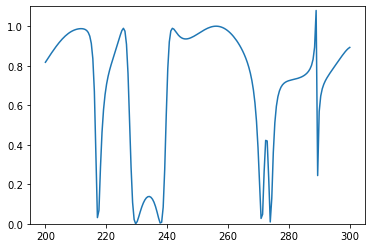

Predicted spectrum: 


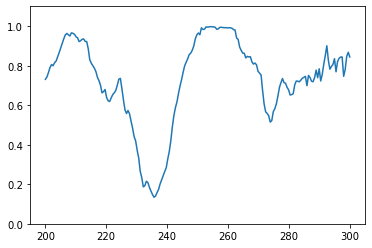

Test 51
True spectrum: 


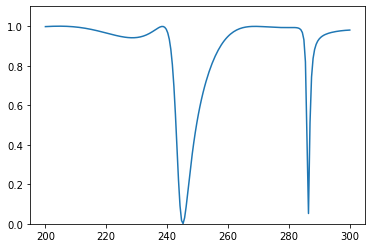

Predicted spectrum: 


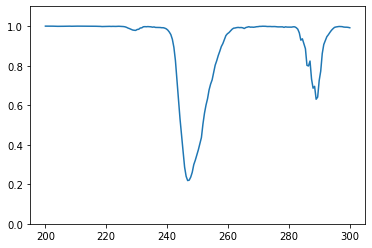

Test 52
True spectrum: 


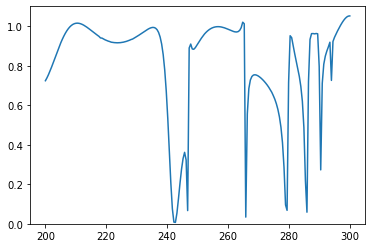

Predicted spectrum: 


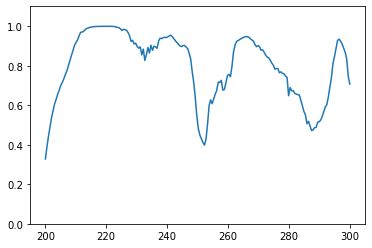

Test 53
True spectrum: 


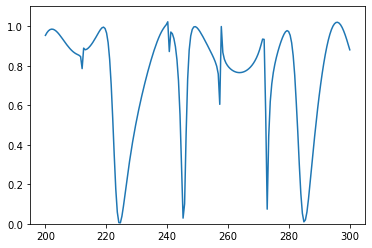

Predicted spectrum: 


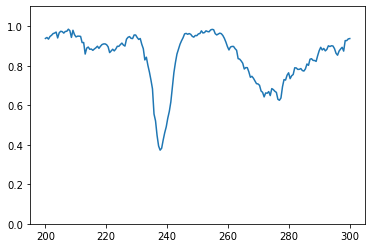

Test 54
True spectrum: 


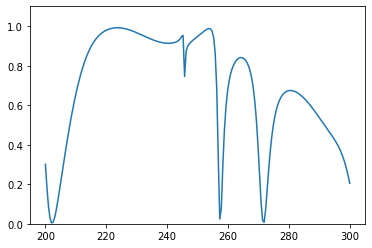

Predicted spectrum: 


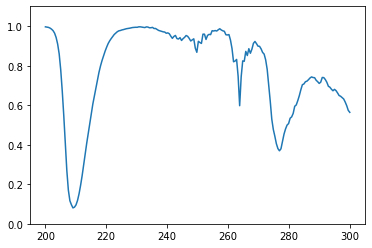

Test 55
True spectrum: 


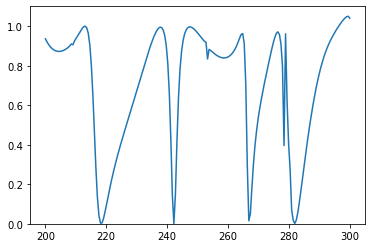

Predicted spectrum: 


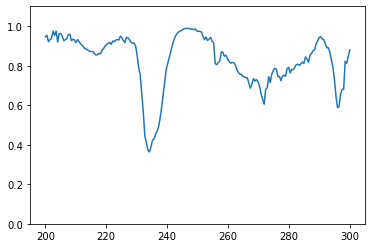

Test 56
True spectrum: 


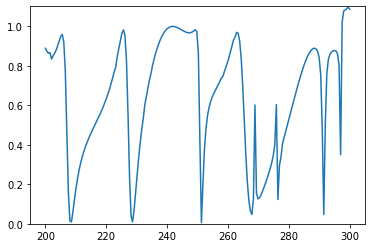

Predicted spectrum: 


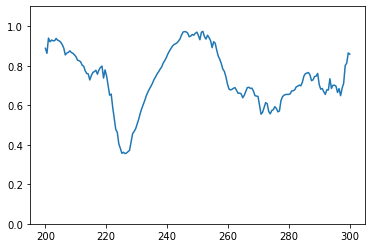

Test 57
True spectrum: 


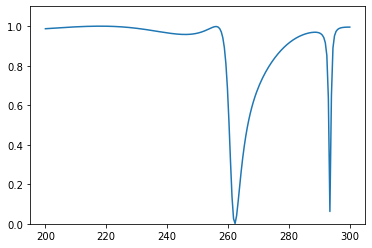

Predicted spectrum: 


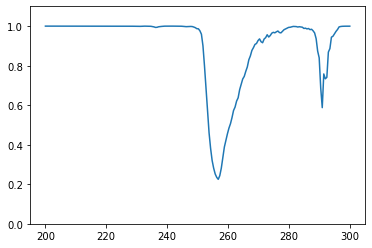

Test 58
True spectrum: 


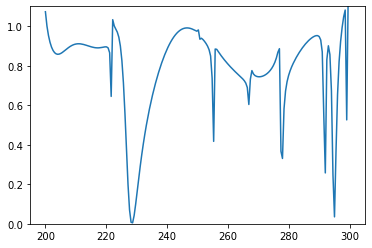

Predicted spectrum: 


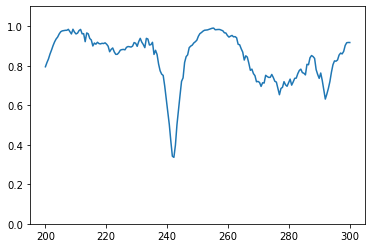

Test 59
True spectrum: 


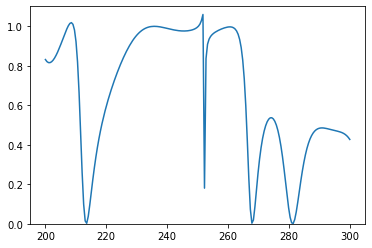

Predicted spectrum: 


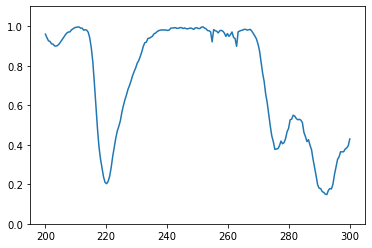

Test 60
True spectrum: 


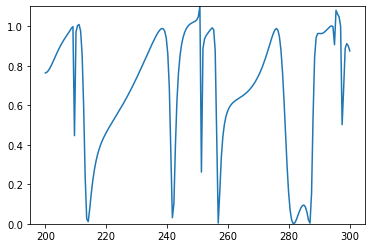

Predicted spectrum: 


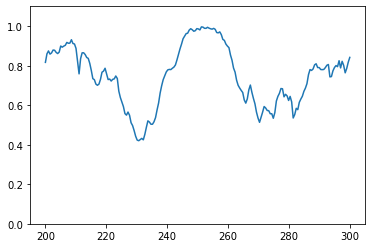

Test 61
True spectrum: 


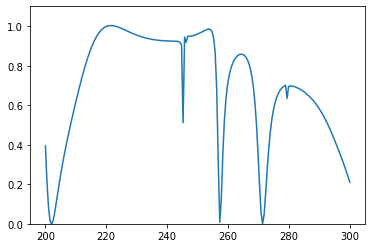

Predicted spectrum: 


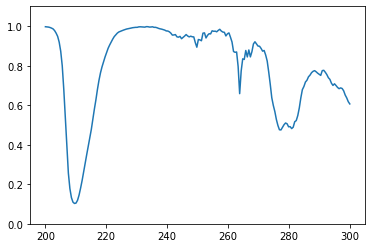

Test 62
True spectrum: 


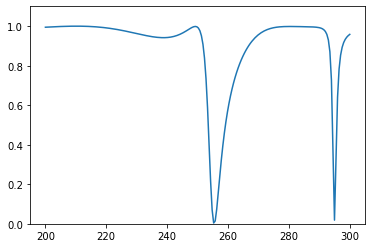

Predicted spectrum: 


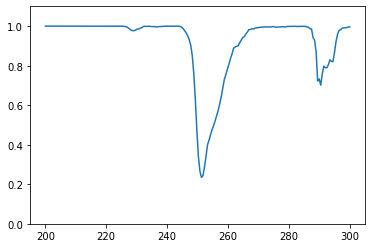

Test 63
True spectrum: 


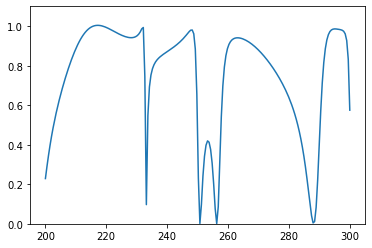

Predicted spectrum: 


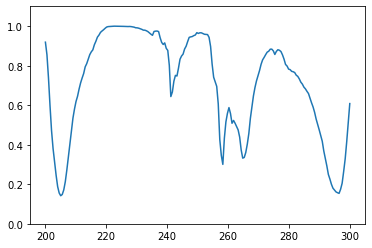

Test 64
True spectrum: 


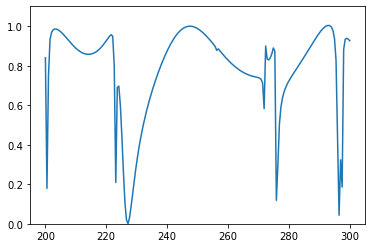

Predicted spectrum: 


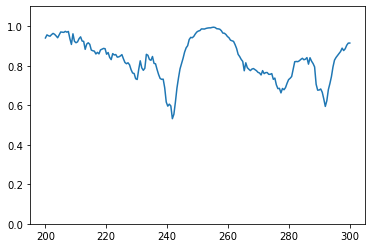

Test 65
True spectrum: 


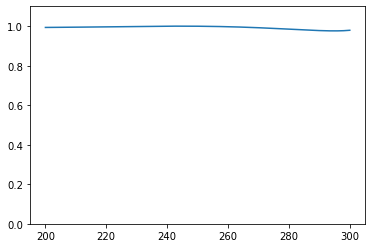

Predicted spectrum: 


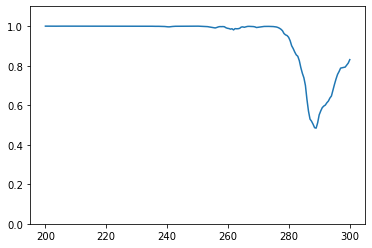

Test 66
True spectrum: 


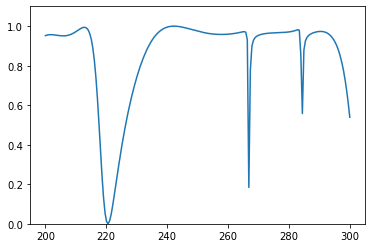

Predicted spectrum: 


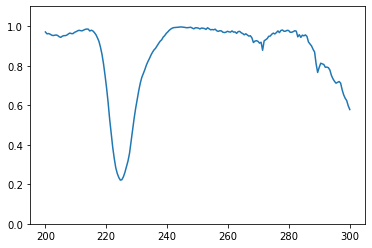

Test 67
True spectrum: 


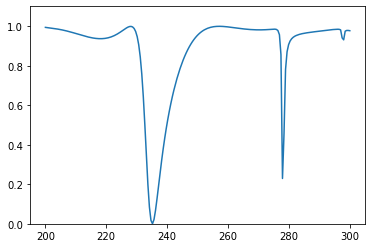

Predicted spectrum: 


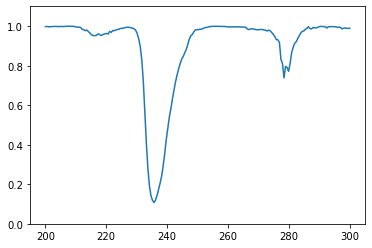

Test 68
True spectrum: 


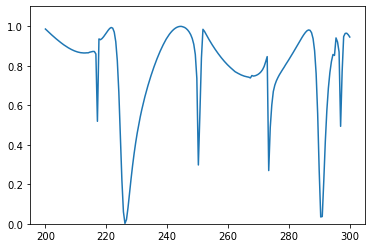

Predicted spectrum: 


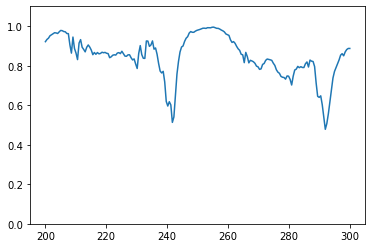

Test 69
True spectrum: 


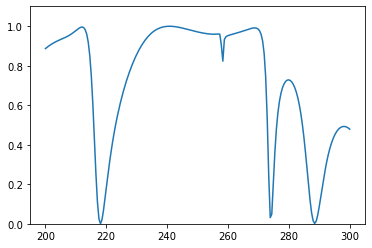

Predicted spectrum: 


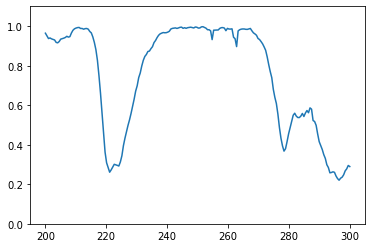

Test 70
True spectrum: 


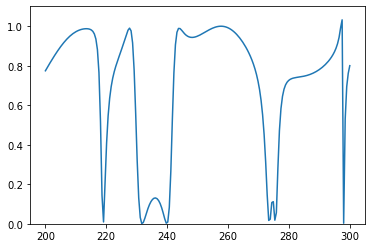

Predicted spectrum: 


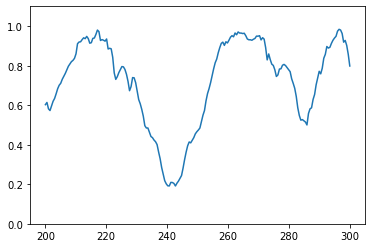

Test 71
True spectrum: 


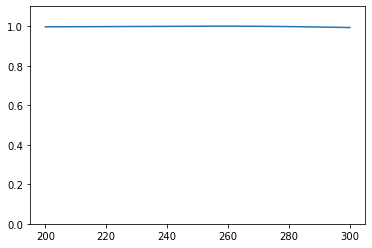

Predicted spectrum: 


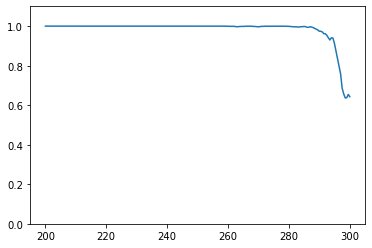

Test 72
True spectrum: 


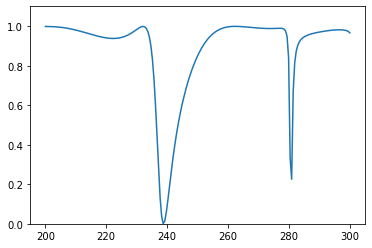

Predicted spectrum: 


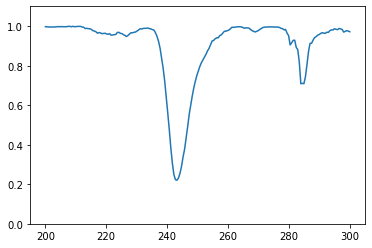

Test 73
True spectrum: 


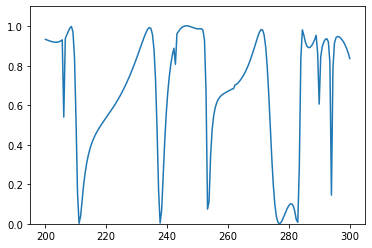

Predicted spectrum: 


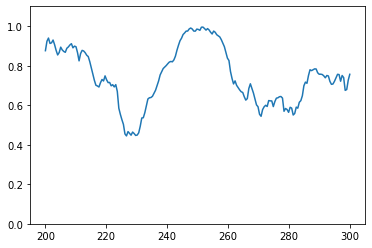

Test 74
True spectrum: 


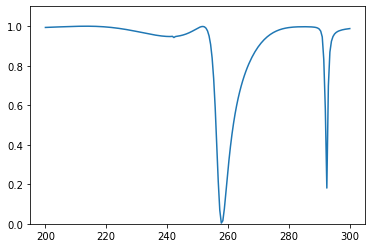

Predicted spectrum: 


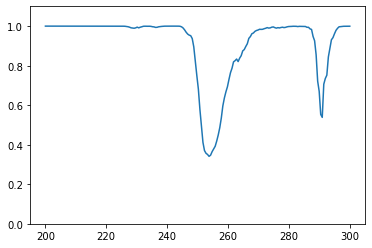

Test 75
True spectrum: 


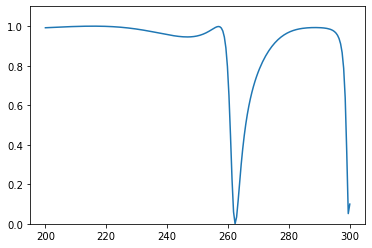

Predicted spectrum: 


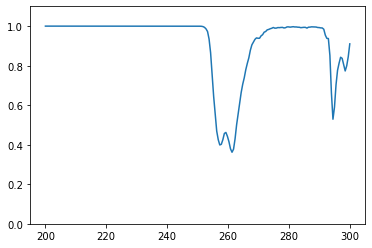

Test 76
True spectrum: 


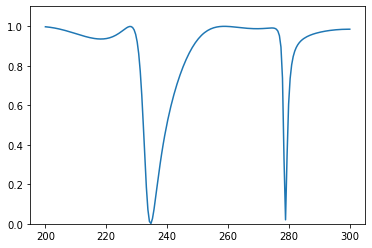

Predicted spectrum: 


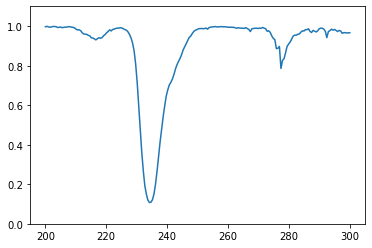

Test 77
True spectrum: 


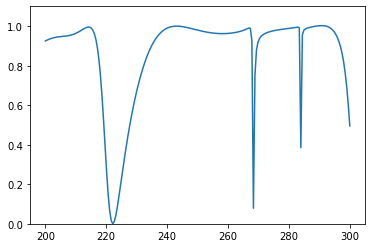

Predicted spectrum: 


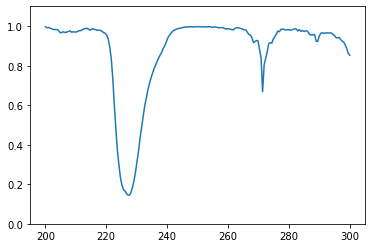

Test 78
True spectrum: 


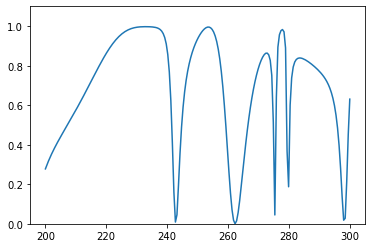

Predicted spectrum: 


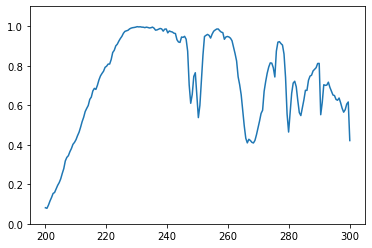

Test 79
True spectrum: 


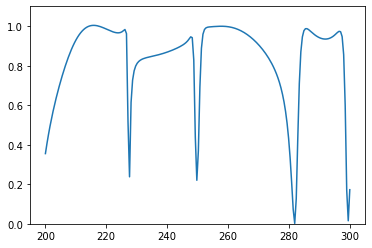

Predicted spectrum: 


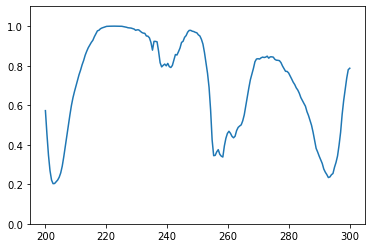

Test 80
True spectrum: 


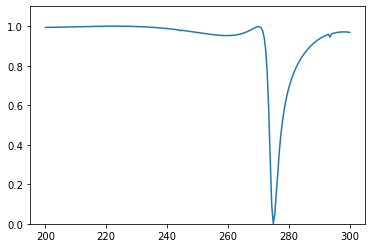

Predicted spectrum: 


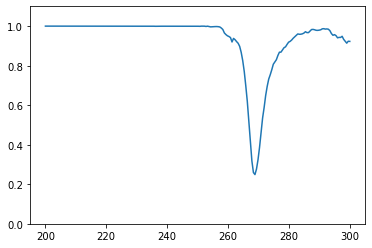

Test 81
True spectrum: 


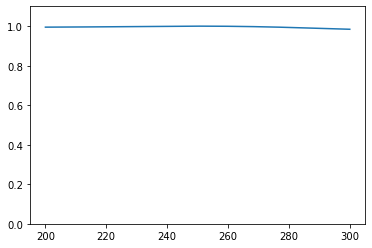

Predicted spectrum: 


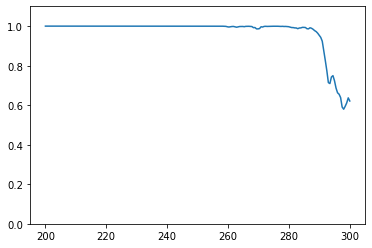

Test 82
True spectrum: 


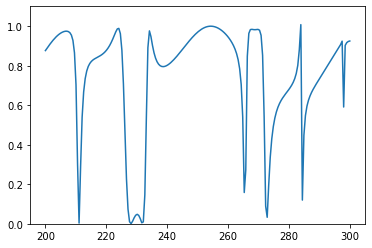

Predicted spectrum: 


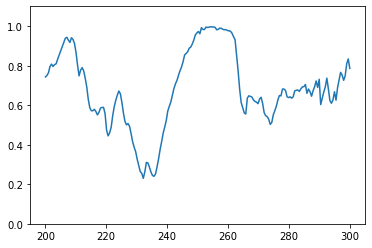

Test 83
True spectrum: 


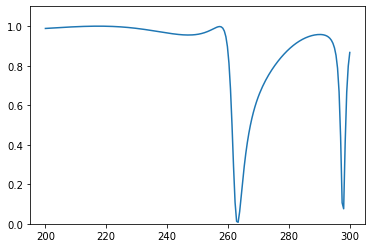

Predicted spectrum: 


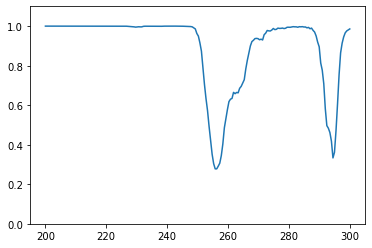

Test 84
True spectrum: 


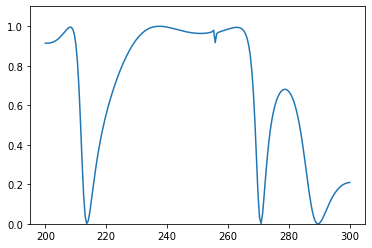

Predicted spectrum: 


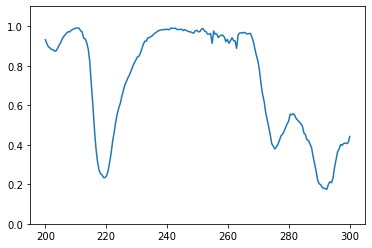

Test 85
True spectrum: 


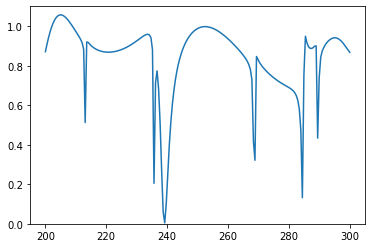

Predicted spectrum: 


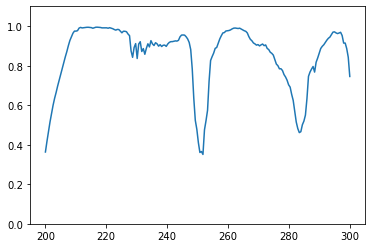

Test 86
True spectrum: 


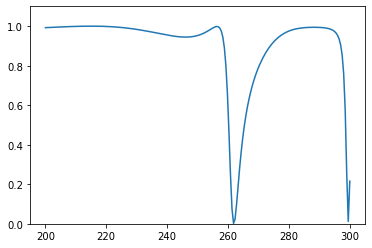

Predicted spectrum: 


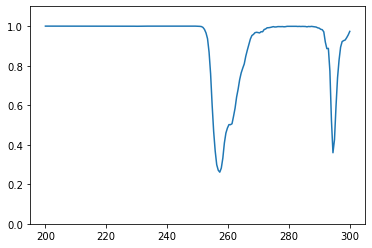

Test 87
True spectrum: 


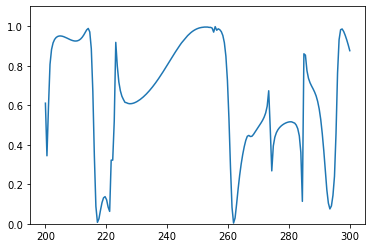

Predicted spectrum: 


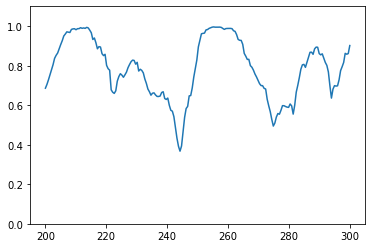

Test 88
True spectrum: 


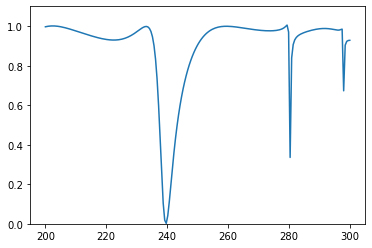

Predicted spectrum: 


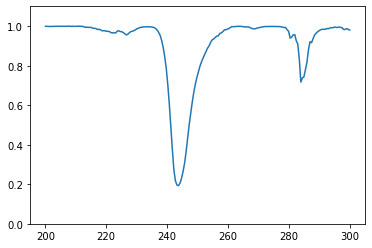

Test 89
True spectrum: 


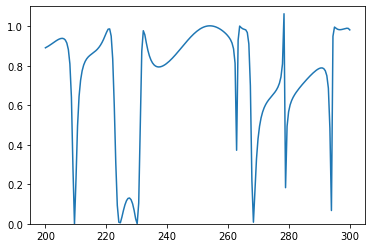

Predicted spectrum: 


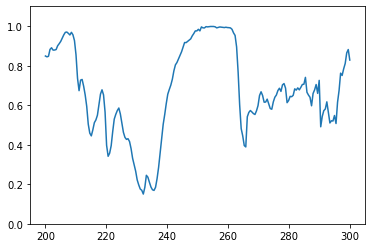

Test 90
True spectrum: 


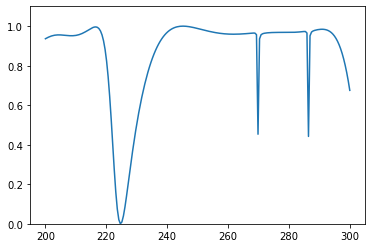

Predicted spectrum: 


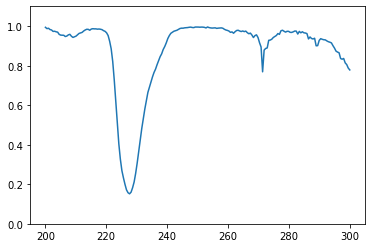

Test 91
True spectrum: 


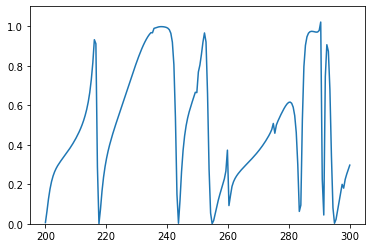

Predicted spectrum: 


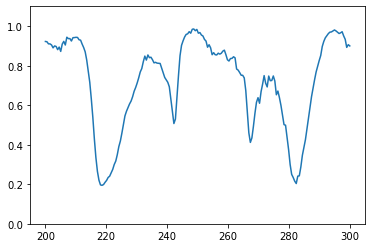

Test 92
True spectrum: 


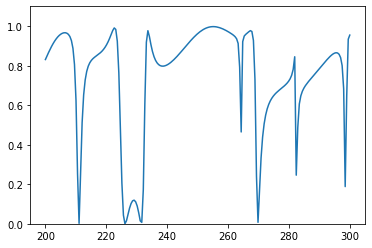

Predicted spectrum: 


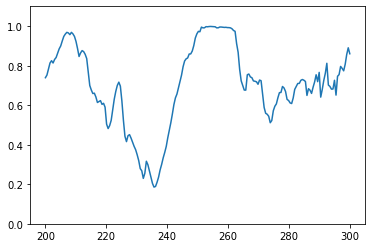

Test 93
True spectrum: 


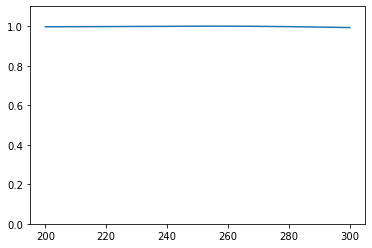

Predicted spectrum: 


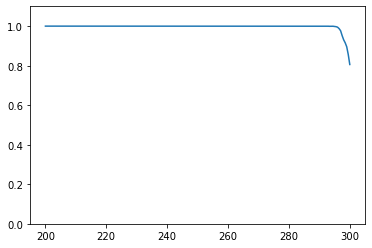

Test 94
True spectrum: 


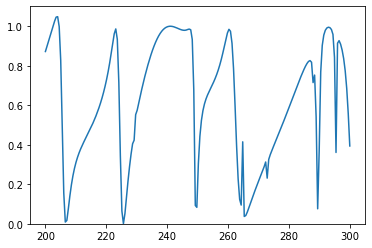

Predicted spectrum: 


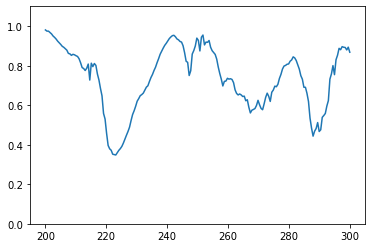

Test 95
True spectrum: 


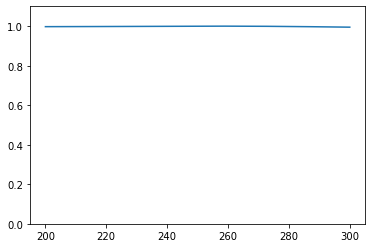

Predicted spectrum: 


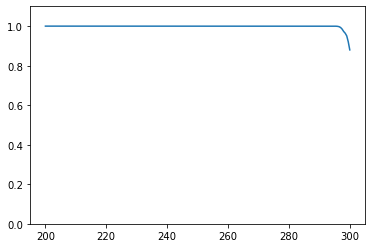

Test 96
True spectrum: 


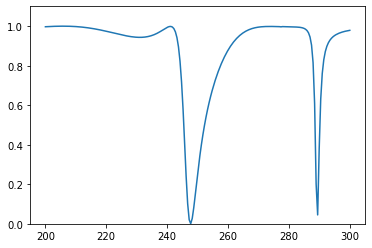

Predicted spectrum: 


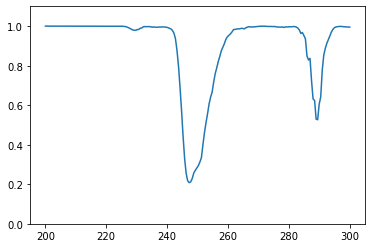

Test 97
True spectrum: 


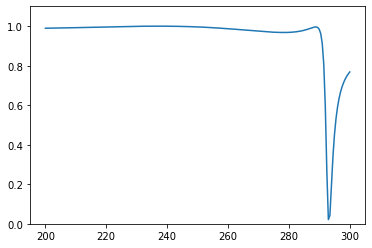

Predicted spectrum: 


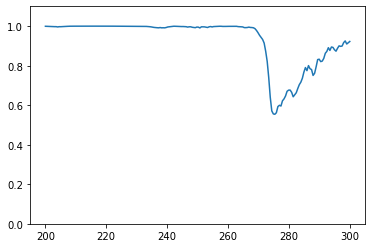

Test 98
True spectrum: 


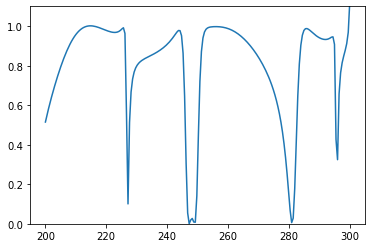

Predicted spectrum: 


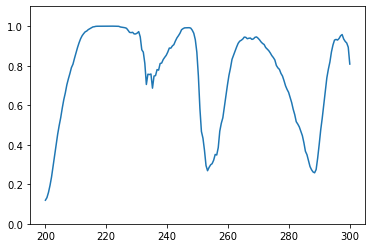

Test 99
True spectrum: 


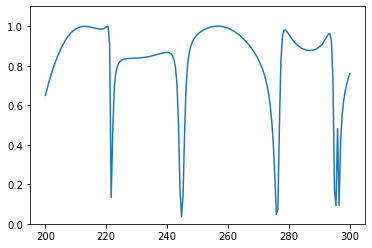

Predicted spectrum: 


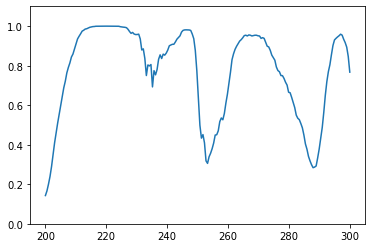

Test 100
True spectrum: 


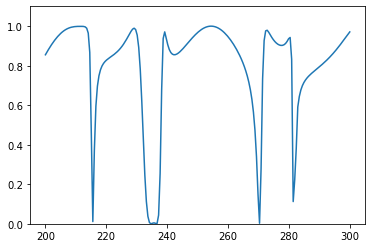

Predicted spectrum: 


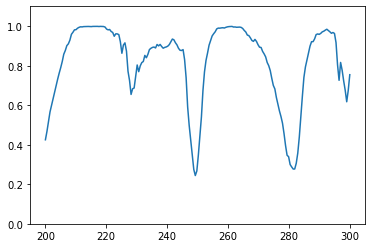

Test 101
True spectrum: 


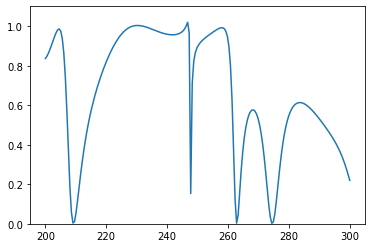

Predicted spectrum: 


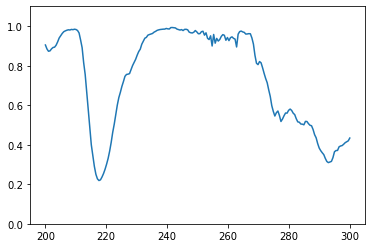

Test 102
True spectrum: 


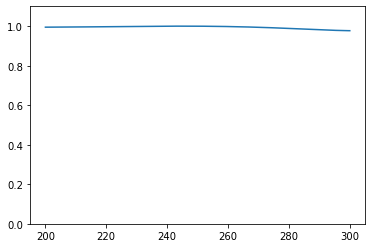

Predicted spectrum: 


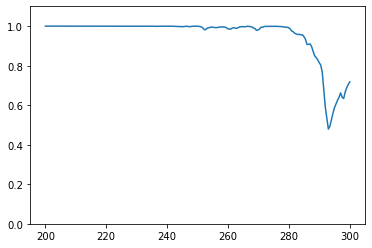

Test 103
True spectrum: 


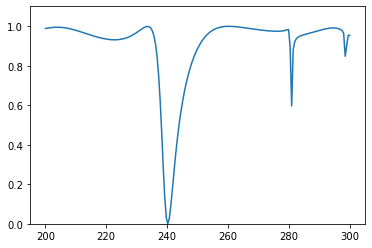

Predicted spectrum: 


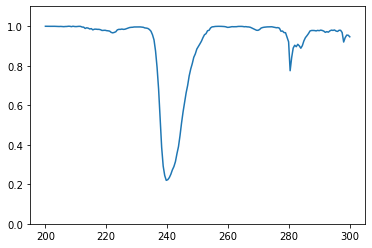

Test 104
True spectrum: 


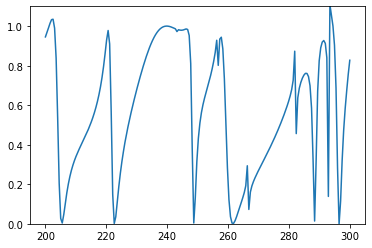

Predicted spectrum: 


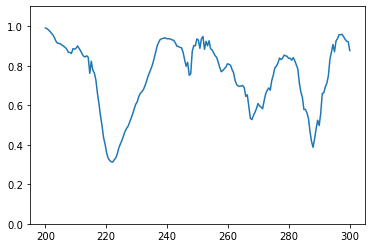

Test 105
True spectrum: 


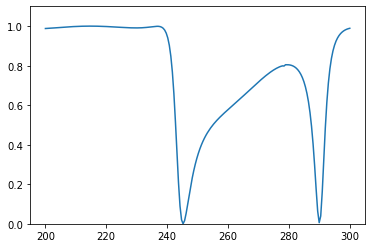

Predicted spectrum: 


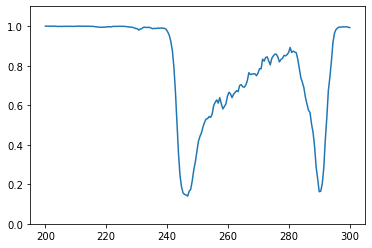

Test 106
True spectrum: 


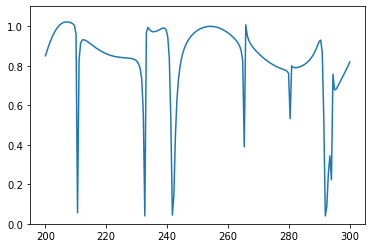

Predicted spectrum: 


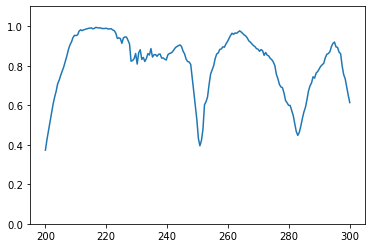

Test 107
True spectrum: 


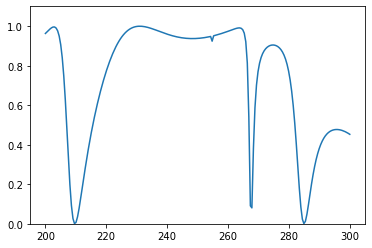

Predicted spectrum: 


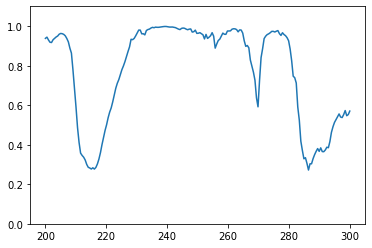

Test 108
True spectrum: 


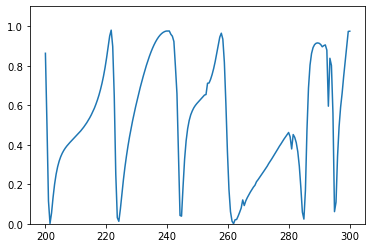

In [ ]:
x = np.genfromtxt('meep_code/data/SP_xaxis.txt')
for i in range(len(test_X)):
    print('Test '+str(i))
    print('True spectrum: ')
    plt.ylim(0, 1.1)
    plt.plot(x, test_Y[i])
    plt.show()
    print('Predicted spectrum: ')
    plt.ylim(0, 1.1)
    plt.plot(x, np.reshape(model.predict(np.reshape(test_X[i], (1, 6))), (200,)))
    plt.show()